<a href="https://colab.research.google.com/github/himanshu120400/ChatApp/blob/master/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [ ]:
#importing csv data and view data
data = pd.read_csv("/content/College_Data.csv")
data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.00,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.30,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.40,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.80,49,40386,99


In [ ]:
#reading first 5 row of dataset
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [ ]:
# here we are droping unnamed column because it contains string value so we drop it....
data.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
# droping
data=data. dropna()
data.isna().sum()

In [ ]:
# this info() function give us the whole info about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [ ]:
pd.set_option('display.float', '{:.2f}'.format)
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.00,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


#Exploring the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


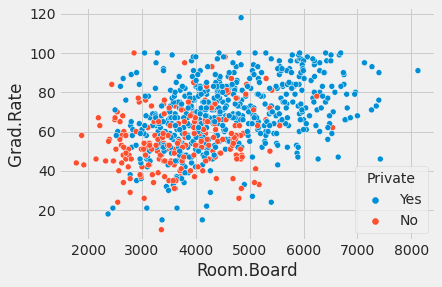

In [ ]:
# Grad.Rate Vs. Room.Board  Scatterplot
sns.scatterplot('Room.Board', 'Grad.Rate', data=data, hue='Private')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


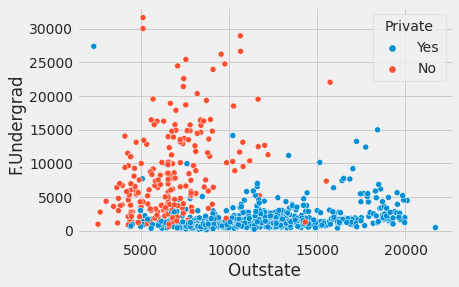

In [ ]:
#F.Undergrad Vs. Outstate Scatterplot
sns.scatterplot('Outstate', 'F.Undergrad', data=data, hue='Private')

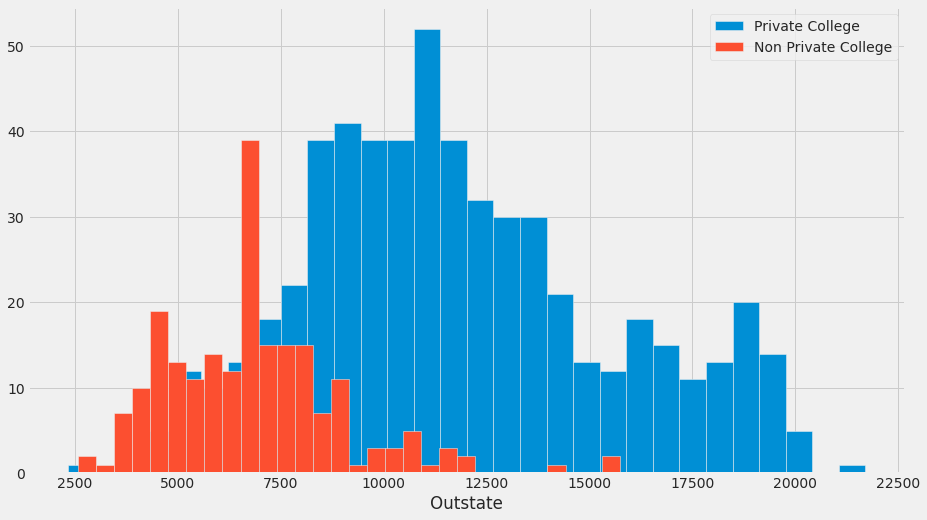

In [ ]:
# histogram of Outstate Tuition based on the Private
plt.figure(figsize=(14, 8))

data.loc[data.Private == 'Yes', 'Outstate'].hist(label="Private College", bins=30)
data.loc[data.Private == 'No', 'Outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

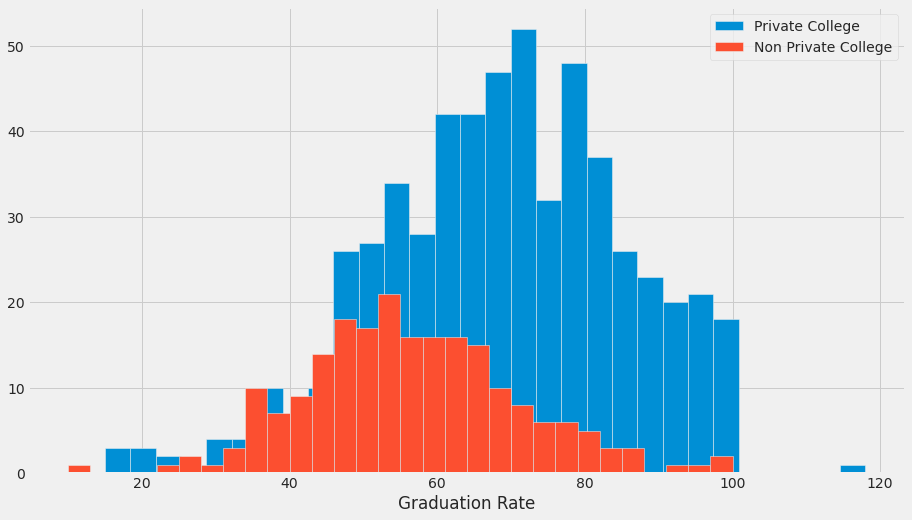

In [ ]:
# histogram of Grad.Rate based on the Private
plt.figure(figsize=(14, 8))

data.loc[data.Private == 'Yes', 'Grad.Rate'].hist(label="Private College", bins=30)
data.loc[data.Private == 'No', 'Grad.Rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

In [ ]:
data[data['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.30,20,7697,118


In [ ]:
data['Grad.Rate']['Cazenovia College'] = 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


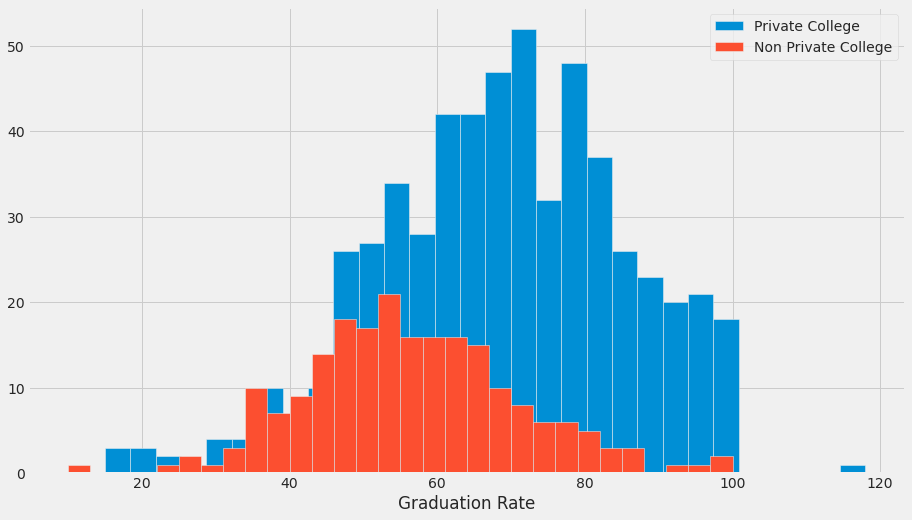

In [ ]:
plt.figure(figsize=(14, 8))

data.loc[data.Private == 'Yes', 'Grad.Rate'].hist(label="Private College", bins=30)
data.loc[data.Private == 'No', 'Grad.Rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

#K Means Cluster Creation

In [ ]:
#Import KMeans from SciKit Learn
from sklearn.cluster import KMeans

In [ ]:
#Create an instance of a K Means model with 2 clusters.
kmeans = KMeans(2)

#Fit the model to all the data except for the Private label.
kmeans.fit(data.drop('Private',axis=1))

In [ ]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01]])

#Evaluation

In [ ]:
data['Private'] = data.Private.astype("category").cat.codes

In [ ]:
data.Private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private, Length: 777, dtype: int8

In [ ]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [ ]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [ ]:
data['Cluster'] = data['Private'].apply(converter)

In [ ]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60,0
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56,0
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54,0
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59,0
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(data.Private, kmeans.labels_))
print(classification_report(data.Private, kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(data.Private, kmeans.labels_))
print(pd.DataFrame(classification_report(data.Private, kmeans.labels_, output_dict=True)))

0.7786357786357786
               0      1  accuracy  macro avg  weighted avg
precision   0.69   0.79      0.78       0.74          0.76
recall      0.35   0.94      0.78       0.64          0.78
f1-score    0.46   0.86      0.78       0.66          0.75
support   212.00 565.00      0.78     777.00        777.00
